http://www.cs.toronto.edu/~tijmen/affNIST/

In [1]:
from lib import load_batch
b = load_batch(1)

In [2]:
b.image[0].shape

(40, 40)

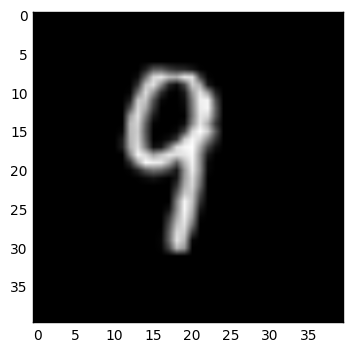

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.imshow(b.image[5], cmap='gray')

In [4]:
image = b.image.reshape(-1, 40, 40, 1)

In [5]:
from sklearn.model_selection import train_test_split

d = train_test_split(image, b.label_one_of_n, test_size=0.1, random_state=42)

In [17]:
from convnet import get_convnet_model
model = get_convnet_model()


(None, 40, 40, 1)
(None, 20, 20, 16)
(None, 20, 20, 16)
(None, 10, 10, 16)
(None, 10, 10, 16)
(None, 1, 1, 10)
(None, 10)


In [18]:
from lib import train_convnet
train_convnet(model, d, 1)

train convnet
54000 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.] [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
Epoch 1/1
54000/54000 [==============================] - 66s - loss: 1.3699 - acc: 0.5964       

In [20]:
from keras.metrics import categorical_accuracy
import tensorflow
# _, test_x, _, test_y = d
test_x, _, test_y, _ = d
test_x, test_y = test_x[0:1000], test_y[0:1000]
pred_y = model.predict(test_x)
with tensorflow.Session():
    acc = categorical_accuracy(tensorflow.convert_to_tensor(test_y), tensorflow.convert_to_tensor(pred_y)).eval()
print(acc)

0.49


In [19]:
print(test_y[3])
print(pred_y[3])

[ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
[ 0.00104938  0.00104938  0.07745279  0.00345893  0.88439566  0.00104938
  0.00142686  0.00233072  0.010163    0.01762394]


In [ ]:
from numpy import genfromtxt
test = genfromtxt("data/test.csv", skip_header=1, delimiter=',')

In [ ]:
test[4]

In [30]:
!head -n3 data/test.csv

Id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276